<a href="https://colab.research.google.com/github/paigeyeung/exowatch-colab/blob/master/Qatar-1b_O-C_and_LS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import bokeh.plotting as bk
from bokeh.models import Range1d, Label

planet = "Qatar-1 b"

# Replace with actual values

epoch_us = [0,5.000000007,7.000000007,12.00000001,24.00000001,26.00000001,345,355,357,357,619,626,788]

o_c_us = [-0.5682098866,-4.342464209,1.779840142,-5.450400263,4.355423972,-3.634271845,0.9452158213,2.756736204,2.687039673,9.023039639,-3.563135639,-0.39206855,-0.8268479258]

uncertainty_us = [4.464855952,14.25627785,5.184774955,2.881444398,2.593741287,4.321058977,2.599454198,3.8931348,4.036983065,4.900104516,2.178528058,2.836827215,0.6063216827]


In [ ]:
def get_plot_xrange (e1, e2):
  max_x = max(e1)
  if max(e2) > max_x:
    max_x = max(e2)

  min_x = min(e1)
  if min(e2) < min_x:
    min_x = min(e2)

  x_overflow = (max_x - min_x)/15

  return(max_x, min_x, x_overflow)

###############################################################

def make_plot (planet, epoch_us, o_c_us, uncertainty_us):

  plot = bk.figure(
    plot_width=600, plot_height=400,
    title = "%s O - C" % (planet),
    x_axis_label = "Epoch (cycle)", y_axis_label = "O - C (min)", 
  )
  err_xs_us = []
  err_ys_us = []

  for x, y, yerr in zip(epoch_us, o_c_us, uncertainty_us):
    err_xs_us.append((x, x))
    err_ys_us.append((y - yerr, y + yerr))

  # for x, y, yerr in zip(epoch_Czech, o_c_Czech, uncertainty_Czech):
  #   err_xs_Czech.append((x, x))
  #   err_ys_Czech.append((y - yerr, y + yerr)) 

  # max_x, min_x, x_overflow = get_plot_xrange (epoch_us)

  min_x = min(epoch_us)
  max_x = max(epoch_us)
  x_axis = [min(epoch_us), max(epoch_us)]
  zeros = [0, 0]

  plot.x_range = Range1d(min_x, max_x)
  plot.multi_line(err_xs_us, err_ys_us, color='red') 
  plot.scatter(epoch_us, o_c_us, size=6, color='red')

  plot.line(x_axis, zeros, color='black')

  plot.title.text_font_size = '14pt'
  plot.xaxis.axis_label_text_font_size = "14pt"
  plot.yaxis.axis_label_text_font_size = "14pt"
  return(plot)

##############################################

bk.output_notebook()
plot = make_plot(planet, epoch_us, o_c_us, uncertainty_us)
bk.show(plot)

# print ("The plot contains %d Czech data points, %d of our data points." % (len(epoch_Czech), len(epoch_us)))

In [ ]:
import pandas as pd

data = pd.DataFrame({
    't':epoch_us,
    'mag':o_c_us,
    'magerr':uncertainty_us
})

In [ ]:
us_data = pd.DataFrame({
    't':epoch_us,
    'mag':o_c_us,
    'magerr':uncertainty_us
})

(0.0, 1000.0)

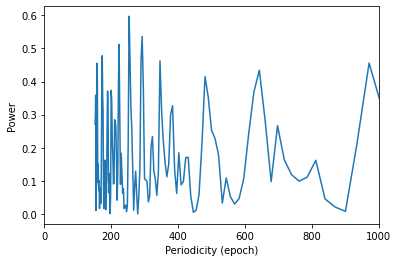

In [ ]:
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt
import math as math

import astropy.units as u
t_days = data.t * u.day
y_mags = data.mag * u.mag
dy_mags = data.magerr * u.mag
frequency, power = LombScargle(t_days, y_mags, dy_mags).autopower()
plt.plot(2*math.pi/frequency, power)
plt.xlabel('Periodicity (epoch)')
plt.ylabel('Power')
plt.xlim([0,1000])

In [ ]:
import numpy as np
from bokeh.plotting import figure, show

def make_plot(title, hist, edges, x):
    p = figure(title=title, plot_width=800, plot_height=300, background_fill_color="#ffffff")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)

    p.y_range.start = 0
    p.xaxis.axis_label = 'x'
    p.yaxis.axis_label = 'Pr(x)'
    p.grid.grid_line_color="white"
    return p

def make_histogram (o_c, title):
  rev_o_c = []
  for num in o_c:
    rev_o_c.append(-1*num)

  hist, edges = np.histogram(rev_o_c, density=True, bins=20)
  p = make_plot(title, hist, edges, rev_o_c)
  bk.output_notebook()
  show(p)

make_histogram(o_c_us, "O - C Histogram")
